# New York City TLC Trip Record
**Created by:** Christian\
**Class Code** JCDS2904\
NYC TLC Trip Record,available for download at <a href="https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N">this Google Drive link</a>.

# 📘 Project Overview:NYC Taxi Trip Analysis
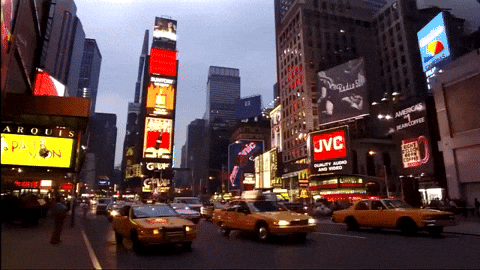

**👥 Stakeholders**
- **Taxi service operators** — responsible for managing fleets and maximizing revenue.
- **City transportation managers** — interested in traffic,congestion,and service efficiency.
- **Pricing and strategy teams** — focused on optimizing fare structures and customer satisfaction.

**❓ Problem Statement**
> The company lacks insights into when and where taxi operations are most profitable. There is also limited understanding of what factors most influence total earnings and tips. This hampers the ability to make informed operational,pricing,and staffing decisions.

**🎯 Goal**
> To uncover patterns in time,location,and trip characteristics that significantly impact total earnings and tips. This analysis aims to deliver actionable recommendations that can improve operational efficiency,optimize resource allocation,and enhance revenue.

# Import Libraries

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.set_option("display.max_rows", 500)
warnings.filterwarnings("ignore")

# Data
1. Read Dataset
2. Data Profiling
3. Data Cleansing
4. Data Transformation

## 1. Read Dataset

---
**🚕 Feature Descriptions**

1. `VendorID`
A code indicating the LPEP (Licensed Technology Service Provider) that provided the record:
- `1`:Creative Mobile Technologies,LLC.
- `2`:VeriFone Inc.

2. `lpep_pickup_datetime`
The date and time when the meter was engaged.

3. `lpep_dropoff_datetime`
The date and time when the meter was disengaged.

4. `store_and_fwd_flag`
Indicates whether the trip record was held in vehicle memory before sending to the vendor (store and forward):
- `Y`:Store and forward trip (no connection at the time).
- `N`:Not a store and forward trip.

5. `RateCodeID`
Final rate code in effect at the end of the trip:
- `1`:Standard rate
- `2`:JFK
- `3`:Newark
- `4`:Nassau or Westchester
- `5`:Negotiated fare
- `6`:Group ride([Reddit][1],[Socrata Developers][2],[Cran][3])

6. `PULocationID`
TLC Taxi Zone where the meter was engaged (pickup location).([Welcome to NYC.gov | City of New York][4])

7. `DOLocationID`
TLC Taxi Zone where the meter was disengaged (drop-off location).

8. `Passenger_count`
Number of passengers in the vehicle (driver-entered).

9. `trip_distance`
Elapsed trip distance in miles reported by the taximeter.

10. `fare_amount`
Time-and-distance fare calculated by the meter.

11. `extra`
Additional charges:
- \$0.50 for trips between 8 PM and 6 AM (night surcharge).
- \$1.00 for trips on weekdays between 4 PM and 8 PM (peak hour surcharge).

12. `mta_tax`
\$0.50 MTA tax automatically triggered based on the metered rate in use.

13. `tip_amount`
Tip amount paid by passengers; this field is automatically populated for credit card tips. Cash tips are not included.

14. `tolls_amount`
Total amount of all tolls paid during the trip.

15. `ehail_fee`
This field was included for potential e-hail fees (e.g.,fees associated with app-based hailing services). However,it is typically null or not populated in the dataset.

16. `improvement_surcharge`
\$0.30 improvement surcharge assessed on hailed trips at the flag drop. This surcharge began being levied in 2015.

17. `total_amount`
Total amount charged to passengers. This includes fare amount,extra charges,MTA tax,tip amount,tolls amount,improvement surcharge,and congestion surcharge. It does not include cash tips.

18. `trip_type`
A code indicating whether the trip was a street hail or a dispatch:

- `1`:Street-hail
- `2`:Dispatch

19. `congestion_surcharge`
A surcharge imposed on trips that begin,end,or pass through Manhattan south of 96th Street (the congestion zone):
- \$2.50 for non-shared trips in taxicabs
- \$2.75 for non-shared trips in for-hire vehicles (including green taxis)
- \$0.75 for shared rides([NYC311][5],[Welcome to NYC.gov | City of New York][6],[Limo Anywhere][7])
---

In [8]:
# NYC trip record data set
df = pd.read_csv("input/NYC TLC Trip Record.csv")

---
**🚕 Feature Descriptions**

1. `LocationID` A unique numeric code representing a specific pickup or dropoff area.

2. `Borough` The larger administrative division where the location is situated (e.g., Manhattan, Queens).

3. `Zone` A more detailed neighborhood or district name within the borough.

4. `service_zone` Categorizes the location by operational area, such as Yellow Zone, Green Zone, or Airport.

---

In [10]:
# NYC TLC Zone data set
zone = pd.read_csv("input/NYC TLC Zone.csv")

df.sample(5)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
64880         2  2023-01-08 04:58:00   2023-01-08 04:59:00                NaN   
32502         2  2023-01-17 12:58:31   2023-01-17 13:03:42                  N   
15016         2  2023-01-08 19:38:41   2023-01-08 19:53:14                  N   
39626         2  2023-01-20 15:56:35   2023-01-20 16:07:57                  N   
29403         2  2023-01-15 15:46:06   2023-01-15 15:58:28                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
64880         NaN           198           198              NaN           0.00   
32502         1.0            41           166              2.0           0.44   
15016         1.0            74           263              1.0           2.81   
39626         1.0            82            82              1.0           1.07   
29403         1.0           166            74              1.0           1.67   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
64880        12.21    0.0      0.0        2.64           0.0        NaN   
32502         6.50    0.0      0.5        0.00           0.0        NaN   
15016        16.30    0.0      0.5        2.00           0.0        NaN   
39626        11.40    0.0      0.5        0.00           0.0        NaN   
29403        11.40    0.0      0.5        3.22           0.0        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
64880                    1.0         15.85           NaN        NaN   
32502                    1.0          8.00           2.0        1.0   
15016                    1.0         22.55           1.0        1.0   
39626                    1.0         12.90           2.0        1.0   
29403                    1.0         16.12           1.0        1.0   

       congestion_surcharge  
64880                   NaN  
32502                  0.00  
15016                  2.75  
39626                  0.00  
29403                  0.00

In [11]:
# Combine NYC trips and NYC zones

# Pick up location
df = pd.merge(
    left=df,
    right=zone[["LocationID", "Borough"]],
    how="left",
    left_on="PULocationID",
    right_on="LocationID",
)
df = df.rename(columns={"Borough": "pickup_location"})
df = df.drop(["LocationID", "PULocationID"], axis=1)

# Drop off location
df = pd.merge(
    left=df,
    right=zone[["LocationID", "Borough"]],
    how="left",
    left_on="DOLocationID",
    right_on="LocationID",
)
df = df.rename(columns={"Borough": "dropoff_location"})
df = df.drop(["LocationID", "DOLocationID"], axis=1)

# Drop location unknown
df = df[df["pickup_location"] != "Unknown"]
df = df[df["dropoff_location"] != "Unknown"]

df

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                NaN   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                NaN   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                NaN   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                NaN   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                NaN   

       RatecodeID  passenger_count  trip_distance  fare_amount  extra  \
0             1.0              1.0           2.58        14.90    1.0   
1             1.0              1.0           1.81        10.70    1.0   
2             1.0              1.0           0.00         7.20    1.0   
3             1.0              1.0           1.30         6.50    0.5   
4             1.0              1.0           1.10         6.00    0.5   
...           ...              ...            ...          ...    ...   
68206         NaN              NaN        4070.82        15.70    0.0   
68207         NaN              NaN           2.14         4.41    0.0   
68208         NaN              NaN           3.44        16.53    0.0   
68209         NaN              NaN           3.03        14.98    0.0   
68210         NaN              NaN           5.82        23.65    0.0   

       mta_tax  tip_amount  tolls_amount  ehail_fee  improvement_surcharge  \
0          0.5        4.03           0.0        NaN                    1.0   
1          0.5        2.64           0.0        NaN                    1.0   
2          0.5        1.94           0.0        NaN                    1.0   
3          1.5        1.70           0.0        NaN                    1.0   
4          1.5        0.00           0.0        NaN                    1.0   
...        ...         ...           ...        ...                    ...   
68206      0.0        0.00           0.0        NaN                    1.0   
68207      0.0        0.00           0.0        NaN                    1.0   
68208      0.0        3.51           0.0        NaN                    1.0   
68209      0.0        3.20           0.0        NaN                    1.0   
68210      0.0        2.00           0.0        NaN                    1.0   

       total_amount  payment_type  trip_type  congestion_surcharge  \
0             24.18           1.0        1.0                  2.75   
1             15.84           1.0        1.0                  0.00   
2             11.64           1.0        1.0                  0.00   
3             10.20           1.0        1.0                  0.00   
4              8.00           1.0        1.0                  0.00   
...             ...           ...        ...                   ...   
68206         16.70           NaN        NaN                   NaN   
68207          5.41           NaN        NaN                   NaN   
68208         21.04           NaN        NaN                   NaN   
68209         19.18           NaN        NaN                   NaN   
68210         29.40           NaN        NaN                   NaN   

      pickup_location dropoff_location  
0           Manhattan        Manhattan  
1           Manhattan        Manhattan  
2              Queens           Queens  
3           Manhattan        Manhattan  
4           Manhattan        Manhattan  
...               ...              ...  
68206        Brooklyn         Brooklyn  
68207          Queens           Queens  
68208     

## 2. Data profiling

In [13]:
# Column data type
dtype = pd.DataFrame(df.dtypes).rename(columns={0: "Data Type"})

# Column value
value = pd.DataFrame(df.head(1)).T.rename(columns={0: "Value"})

dtype.join(value)

Data Type                Value
VendorID                  int64                    2
lpep_pickup_datetime     object  2023-01-01 00:26:10
lpep_dropoff_datetime    object  2023-01-01 00:37:11
store_and_fwd_flag       object                    N
RatecodeID              float64                  1.0
passenger_count         float64                  1.0
trip_distance           float64                 2.58
fare_amount             float64                 14.9
extra                   float64                  1.0
mta_tax                 float64                  0.5
tip_amount              float64                 4.03
tolls_amount            float64                  0.0
ehail_fee               float64                  NaN
improvement_surcharge   float64                  1.0
total_amount            float64                24.18
payment_type            float64                  1.0
trip_type               float64                  1.0
congestion_surcharge    float64                 2.75
pickup_location          object            Manhattan
dropoff_location         object            Manhattan

In [14]:
# Check invalid value
df.describe()

VendorID    RatecodeID  passenger_count  trip_distance  \
count  67499.000000  63195.000000     63195.000000   67499.000000   
mean       1.863791      1.097824         1.317019       8.147393   
std        0.343013      1.297950         0.980543     588.183049   
min        1.000000      1.000000         0.000000       0.000000   
25%        2.000000      1.000000         1.000000       1.130000   
50%        2.000000      1.000000         1.000000       1.850000   
75%        2.000000      1.000000         1.000000       3.200000   
max        2.000000     99.000000         9.000000  120098.840000   

        fare_amount         extra       mta_tax    tip_amount  tolls_amount  \
count  67499.000000  67499.000000  67499.000000  67499.000000  67499.000000   
mean      16.404328      0.830368      0.589642      2.133179      0.163234   
std       12.739917      1.272029      0.383603      2.980302      1.058968   
min      -70.000000     -2.500000     -0.500000    -10.500000      0.000000   
25%        9.300000      0.000000      0.500000      0.000000      0.000000   
50%       13.300000      0.000000      0.500000      1.600000      0.000000   
75%       19.800000      1.000000      0.500000      3.330000      0.000000   
max      490.000000      7.500000      2.750000    222.220000     36.050000   

       ehail_fee  improvement_surcharge  total_amount  payment_type  \
count        0.0           67499.000000  67499.000000  63195.000000   
mean         NaN               0.952304     21.591825      1.373147   
std          NaN               0.195117     14.746448      0.507528   
min          NaN              -1.000000    -71.500000      1.000000   
25%          NaN               1.000000     12.900000      1.000000   
50%          NaN               1.000000     17.850000      1.000000   
75%          NaN               1.000000     26.035000      2.000000   
max          NaN               1.000000    491.000000      5.000000   

          trip_type  congestion_surcharge  
count  63186.000000          63195.000000  
mean       1.018153              0.734227  
std        0.133505              1.216807  
min        1.000000             -2.750000  
25%        1.000000              0.000000  
50%        1.000000              0.000000  
75%        1.000000              2.750000  
max        2.000000              2.750000

In [15]:
# Check unique value
pd.DataFrame(df.nunique()).rename(columns={0: "Unique Value"})

Unique Value
VendorID                          2
lpep_pickup_datetime          65903
lpep_dropoff_datetime         65838
store_and_fwd_flag                2
RatecodeID                        6
passenger_count                  10
trip_distance                  1801
fare_amount                    2504
extra                            15
mta_tax                           6
tip_amount                     1459
tolls_amount                     25
ehail_fee                         0
improvement_surcharge             5
total_amount                   4578
payment_type                      5
trip_type                         2
congestion_surcharge              4
pickup_location                   5
dropoff_location                  6

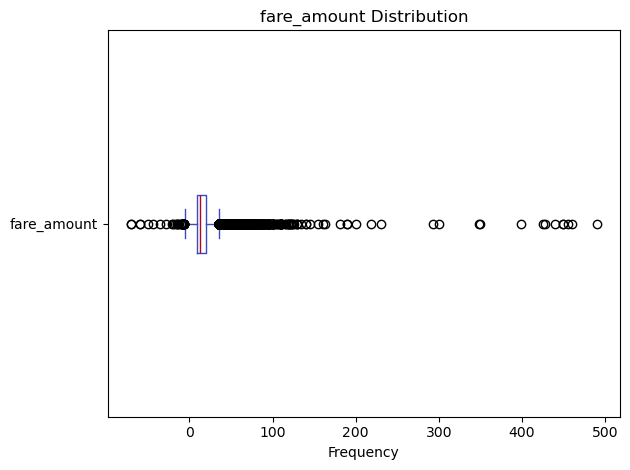

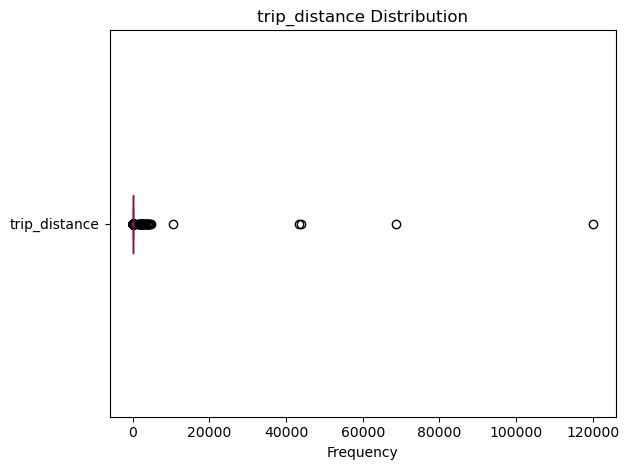

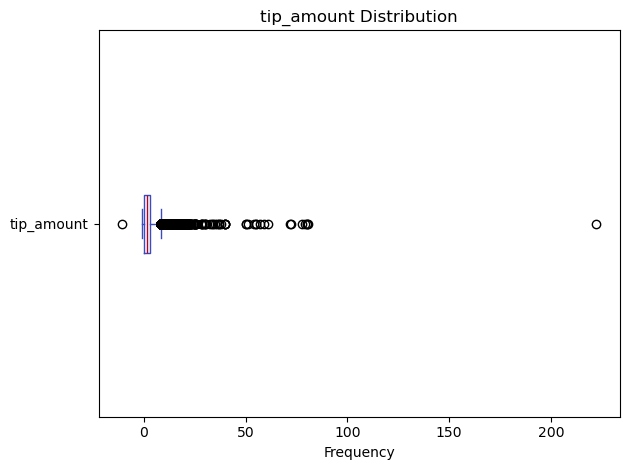

In [16]:
# Check outlier
cols = ["fare_amount", "trip_distance", "tip_amount"]

for col in cols:
    df[col].plot(kind="box", cmap="coolwarm", vert=False)

    plt.title(f"{col} Distribution")
    plt.xlabel("Frequency")

    plt.tight_layout()
    plt.show()
    print()

In [17]:
# Check correlation
check_corr = df.drop(
    columns=[
        "lpep_pickup_datetime",
        "lpep_dropoff_datetime",
        "store_and_fwd_flag",
        "pickup_location",
        "dropoff_location",
    ]
)

check_corr.corr()

VendorID  RatecodeID  passenger_count  trip_distance  \
VendorID               1.000000   -0.010817         0.084034       0.003996   
RatecodeID            -0.010817    1.000000        -0.003118       0.023677   
passenger_count        0.084034   -0.003118         1.000000       0.006794   
trip_distance          0.003996    0.023677         0.006794       1.000000   
fare_amount            0.009140    0.085459         0.012047       0.013342   
extra                 -0.138335   -0.042663        -0.006703      -0.005835   
mta_tax               -0.911234   -0.078058        -0.080890      -0.014866   
tip_amount             0.059344    0.003896         0.026613       0.003263   
tolls_amount          -0.019162    0.019686         0.003932       0.000748   
ehail_fee                   NaN         NaN              NaN            NaN   
improvement_surcharge -0.073761   -0.033614         0.027175      -0.001719   
total_amount           0.021407    0.067825         0.018989       0.012049   
payment_type           0.008211   -0.014937        -0.014933      -0.016947   
trip_type              0.036679    0.937066         0.000886       0.003623   
congestion_surcharge   0.008550   -0.032363         0.022792       0.087738   

                       fare_amount     extra   mta_tax  tip_amount  \
VendorID                  0.009140 -0.138335 -0.911234    0.059344   
RatecodeID                0.085459 -0.042663 -0.078058    0.003896   
passenger_count           0.012047 -0.006703 -0.080890    0.026613   
trip_distance             0.013342 -0.005835 -0.014866    0.003263   
fare_amount               1.000000 -0.000348 -0.077078    0.322436   
extra                    -0.000348  1.000000  0.200978    0.104435   
mta_tax                  -0.077078  0.200978  1.000000   -0.090364   
tip_amount                0.322436  0.104435 -0.090364    1.000000   
tolls_amount              0.335531  0.067066 -0.014911    0.195526   
ehail_fee                      NaN       NaN       NaN         NaN   
improvement_surcharge     0.070813  0.077441  0.151373    0.026183   
total_amount              0.965981  0.108392 -0.077522    0.523634   
payment_type             -0.057262 -0.086241 -0.031023   -0.511851   
trip_type                 0.161557 -0.076468 -0.232437    0.018346   
congestion_surcharge      0.170296  0.089208  0.009777    0.276149   

                       tolls_amount  ehail_fee  improvement_surcharge  \
VendorID                  -0.019162        NaN              -0.073761   
RatecodeID                 0.019686        NaN              -0.033614   
passenger_count            0.003932        NaN               0.027175   
trip_distance              0.000748        NaN              -0.001719   
fare_amount                0.335531        NaN               0.070813   
extra                      0.067066        NaN               0.077441   
mta_tax                   -0.014911        NaN               0.151373   
tip_amount                 0.195526        NaN               0.026183   
tolls_amount               1.000000        NaN               0.014888   
ehail_fee                       NaN        NaN                    NaN   
improvement_surcharge      0.014888        NaN               1.000000   
total_amount               0.404792        NaN               0.088296   
payment_type              -0.040995        NaN              -0.071490   
trip_type                  0.007132        NaN              -0.088941   
congestion_surcharge      -0.034621        NaN               0.003677   

                       total_amount  payment_type  trip_type  \
VendorID                   0.021407      0.008211   0.036679   
RatecodeID                 0.067825     -0.014937   0.937066   
passenger_count            0.018989     -0.014933   0.000886   
trip_distance              0.012049     -0.016947   0.003623   
fare_amount                0.965981     -0.057262   0.161557   
extra                      0.108392     -0.086241  -0.076468   
mta_tax             

**Result:**
1. Change `lpep_pickup_datetime` and `lpep_dropoff_datetime` type ⟶ `Datetime64`
1. Missing Data at `RateCodeID`,`passenger_count`,`payment_type`,`trip_type`,and `congestion_surcharge`
1. Remove `ehail_fee` entirely data missing
1. Mapping:`VendorID`,`store_and_fwd_flag`,`RateCodeID`,and `trip_type`
1. Invalid value:
    - `fare_amount` minimal \$ -70.00?
    - `extra` minimal \$ -2,50?
    - `mta_tax` minimal \$ -0.50?
    - `tip_amount` minimal \$ -10.50?
    - `improvement_surcharge` minimal \$ -1.00?
    - `total_amount` minimal \$ -71.50?
    - `congestion_surcharge` minimal \$ -2.75?
    - `trip_distance` is 0?
1. Outlier:
    - `fare_amount` more than \$ 200
    - `trip_distance` more than 200 miles
    - `tip_amount` more than \$ 50
1. Correlation:
    - `fare_ammount` and `total_amount`=0.97
    - `tip_amount` and `total_amount`=0.51
    - `tolls_amount` and `total_amount`=0.41
    - `fare_amount` and `tip_ammount`=0.31

## 3. Data Cleansing
1. Handle Missing Values
2. Remove Duplicates
3. Remove Invalid Values
4. Remove Outliers

### Handle Missing Values

In [21]:
# Check how many row effected by missing values
check_missing = pd.DataFrame(
    round(df.isna().sum() / len(df) * 100, 2).astype(str) + "%"
).rename(columns={0: "Missing Value"})

check_missing[check_missing["Missing Value"] != "0.0%"]

Missing Value
store_and_fwd_flag           6.38%
RatecodeID                   6.38%
passenger_count              6.38%
ehail_fee                   100.0%
payment_type                 6.38%
trip_type                    6.39%
congestion_surcharge         6.38%

<div class="alert alert-danger">Dropping the rows,since they represent only 6.35% of the total data.</div>

In [23]:
print("Before drop missing value:", len(df))
df = df.drop(columns=["ehail_fee"]).dropna()
print("After drop missing value:", len(df))

Before drop missing value: 67499
After drop missing value: 63186


### Remove Duplicates

In [25]:
# Check how many row have duplicate
pd.DataFrame(df.duplicated().value_counts())

count
False  63186

<div class="alert alert-success">Never mind,there are no duplicates</div>

### Remove Invalid Values

In [28]:
# Check how many row effected by invalid value
check_invalid = df[
    [
        "fare_amount",
        "extra",
        "mta_tax",
        "tip_amount",
        "improvement_surcharge",
        "total_amount",
        "congestion_surcharge",
        "trip_distance",
    ]
].copy()

# fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, total_amount, congestion_surcharge
check_invalid = pd.DataFrame(
    round((check_invalid < 0).sum() / len(check_invalid) * 100, 2).astype(str) + "%"
).rename(columns={0: "Invalid Value"})

# trip_distance
check_invalid.iloc[7] = (
    round((df["trip_distance"] < 0.62).sum() / len(df) * 100, 2).astype(str) + "%"
)

check_invalid[check_invalid["Invalid Value"] != "0.0%"]

Invalid Value
fare_amount                   0.26%
extra                         0.13%
mta_tax                       0.25%
tip_amount                    0.01%
improvement_surcharge         0.27%
total_amount                  0.27%
trip_distance                 10.0%

<div class="alert alert-danger">Dropping the rows,since they represent only 0.27% of the total data and dropping 10.0% of the rows where trip_distance is below 1 KM.</div>

In [30]:
print("Before drop invalid value:", len(df))
df = df[df["fare_amount"] >= 0]
df = df[df["extra"] >= 0]
df = df[df["mta_tax"] >= 0]
df = df[df["tip_amount"] >= 0]
df = df[df["improvement_surcharge"] >= 0]
df = df[df["total_amount"] >= 0]
df = df[df["congestion_surcharge"] >= 0]
df = df[df["trip_distance"] > 0.62]
print("After drop invalid value:", len(df))

Before drop invalid value: 63186
After drop invalid value: 56750


### Remove Outliers
- `fare_amount`>200
- `trip_distance`>200
- `tip_amount`>50

In [32]:
outlier = [["fare_amount", 200], ["trip_distance", 200], ["tip_amount", 50]]

# Check how many row effected by outlier
check_outlier = []

for col in outlier:
    percentage = round((df[col[0]] > col[1]).sum() / len(df) * 100, 3).astype(str) + "%"
    check_outlier.append([col[0], percentage])

pd.DataFrame(check_outlier, columns=["", "Outlier Value"]).set_index("")

Outlier Value
                           
fare_amount          0.007%
trip_distance        0.002%
tip_amount           0.023%

<div class="alert alert-danger">Dropping the row,with outlier value.</div>

In [34]:
print("Before drop outlier value:", len(df))

for col in outlier:
    df = df[df[col[0]] < col[1]]

print("After drop invalid value:", len(df))

Before drop outlier value: 56750
After drop invalid value: 56730


## 4. Data Transformation
- Covert Data Types
- Create Columns
- Value Mapping

### Convert Data Types

In [37]:
# Change lpep_pickup_datetime data type to datetime
df["lpep_pickup_datetime"] = pd.to_datetime(
    df["lpep_pickup_datetime"], infer_datetime_format=True
)

# Change lpep_dropoff_datetime data type to datetime
df["lpep_dropoff_datetime"] = pd.to_datetime(
    df["lpep_dropoff_datetime"], infer_datetime_format=True
)

pd.DataFrame(df.dtypes).rename(columns={0: "Data Type"})

Data Type
VendorID                        int64
lpep_pickup_datetime   datetime64[ns]
lpep_dropoff_datetime  datetime64[ns]
store_and_fwd_flag             object
RatecodeID                    float64
passenger_count               float64
trip_distance                 float64
fare_amount                   float64
extra                         float64
mta_tax                       float64
tip_amount                    float64
tolls_amount                  float64
improvement_surcharge         float64
total_amount                  float64
payment_type                  float64
trip_type                     float64
congestion_surcharge          float64
pickup_location                object
dropoff_location               object

### Value Mapping

1. `VendorID`
    - `1` ⟶ Creative Mobile Technologies,LLC.
    - `2` ⟶ VeriFone Inc.
1. `TripType`
    - `Y` ⟶ Store and forward trip
    - `N` ⟶ Not a store and forward trip
1. `RateCodeID`
    - `1` ⟶ Standard rate
    - `2` ⟶ JFK
    - `3` ⟶ Newark
    - `4` ⟶ Nassau or Westchester
    - `5` ⟶ Negotiated fare
    - `6` ⟶ Group ride
1. `TripType`
    - `1` ⟶ Street-hail
    - `2` ⟶ Dispatch

In [40]:
# VendorID
vendor_map = {1: "Creative Mobile Technologies,LLC", 2: "VeriFone Inc"}
df["VendorID"] = df["VendorID"].map(vendor_map)

# store_and_fwd_flag
store_and_fwd_map = {"Y": "Store and Forward Trip", "N": "Not a Store and Forward Trip"}
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].map(store_and_fwd_map)

# RateCodeID
rate_code_map = {
    1: "Standard rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated fare",
    6: "Group ride",
}

df["RatecodeID"] = df["RatecodeID"].map(rate_code_map)


# payment_type
payment_type_map = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip",
}

df["payment_type"] = df["payment_type"].map(payment_type_map)

# trip_type
trip_type_map = {1: "Street-hail", 2: "Dispatch"}
df["trip_type"] = df["trip_type"].map(trip_type_map)

### Create Columns

In [42]:
# Rename Columns
df.rename(
    columns={
        "VendorID": "vendor_id",
        "lpep_pickup_datetime": "pickup_datetime",
        "lpep_dropoff_datetime": "dropoff_datetime",
        "store_and_fwd_flag": "store_forward_flag",
        "RatecodeID": "rate_code",
        "extra": "extra_charge",
    },
    inplace=True,
)

In [43]:
# Get name of the day from pick up date
df["day"] = df["pickup_datetime"].dt.day_name()

# "Weekday" or "Weekend"
df["day_type"] = df["day"].apply(
    lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday"
)

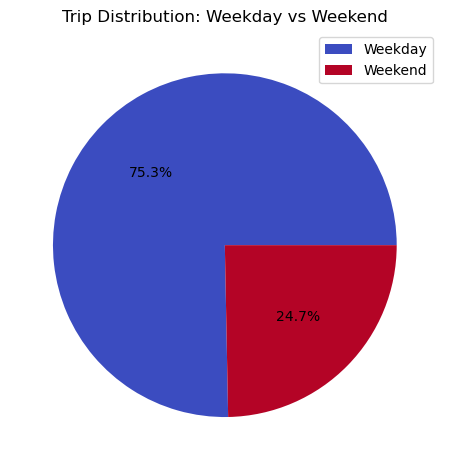

In [44]:
# Count day type
day_counts = df["day_type"].value_counts()

day_counts.plot(
    kind="pie", autopct="%1.1f%%", colormap="coolwarm", legend=True, labels=None
)

plt.title("Trip Distribution: Weekday vs Weekend")
plt.ylabel("")

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert"> I want to focus the analysis on weekdays only because the majority of trips occur on weekdays. </div>

In [46]:
# Filter Weekend
df = df[df["day_type"] == "Weekday"]

#### 1. Chasing the Golden Hours

In [48]:
# Earnings = total amount + tip amount
df["earnings"] = df["total_amount"] + df["tip_amount"]

# Hour = 1, 2, 3, ...., 24
df["hour"] = df["pickup_datetime"].dt.hour + 1

# Assume bellow Q1 is short trip
distance_25 = df["trip_distance"].quantile(0.25)

df["trip_type"] = np.where(
    df["trip_distance"] <= distance_25, "Short Trip", "Long Trip"
)

# duration min = (seconds of drop off - second of pick up) / 60
df["duration_min"] = (
    pd.to_datetime(df["dropoff_datetime"]) - df["pickup_datetime"]
).dt.total_seconds() / 60

# Staten Island spikes
staten_df = df[df["pickup_location"] == "Staten Island"]

staten_hourly = (
    staten_df.groupby("hour")
    .agg(avg_earnings=("earnings", "mean"), trip_count=("earnings", "count"))
    .reset_index()
)

#### 2. What Really Drives Tips?

In [50]:
numeric_cols = [
    "trip_distance",
    "duration_min",
    "passenger_count",
    "fare_amount",
    "tip_amount",
]

# Check correlation that possible increasing tip_amount
correlations = df[numeric_cols].corr()
tip_corr = pd.DataFrame(correlations["tip_amount"].sort_values(ascending=True)).rename(
    columns={"tip_amount": "correlation"}
)
tip_corr = tip_corr.drop("tip_amount")

#### 3. The Hidden Cost of “Busy”

In [52]:
# earnings per min = earnings / duration min
df["earnings_per_min"] = df["earnings"] / df["duration_min"]

# earnings per mile = earnings / trip distance
df["earnings_per_mile"] = df["earnings"] / df["trip_distance"]

# effort return = trips have duration min higher then 0
effort_return = df[df["duration_min"] > 0]

effort_return["earnings_per_min"] = (
    effort_return["earnings"] / effort_return["duration_min"]
)
effort_return["earnings_per_mile"] = (
    effort_return["earnings"] / effort_return["trip_distance"]
)

# Assume Q1 is low efficiency
low_min_threshold = df["earnings_per_min"].quantile(0.25)
low_mile_threshold = df["earnings_per_mile"].quantile(0.25)

# Waste time and waste distance/fuel
low_efficiency = effort_return[
    (effort_return["earnings_per_min"] < low_min_threshold)
    & (effort_return["earnings_per_mile"] < low_mile_threshold)
]

grouped_low_eff = (
    low_efficiency.groupby(["pickup_location", "hour"])
    .size()
    .reset_index(name="low_eff_trip_count")
)

total_trips = (
    df.groupby(["pickup_location", "hour"]).size().reset_index(name="total_trips")
)

merged = pd.merge(grouped_low_eff, total_trips, on=["pickup_location", "hour"])
merged["low_eff_rate"] = merged["low_eff_trip_count"] / merged["total_trips"]

heatmap_data = merged.pivot(
    index="pickup_location", columns="hour", values="low_eff_rate"
)

#### 4. Profitable vs. Unprofitable Trip Segmentation

In [54]:
tip_25 = df["tip_amount"].quantile(0.25)

# Assume tips bellow Q1 is low tip
df["tip_segment"] = np.where(df["tip_amount"] <= tip_25, "Low Tip", "High Tip")

# Count trips by tip & payment segmentation
payment_group = (
    df.groupby(["tip_segment", "payment_type"])["vendor_id"]
    .count()
    .unstack(fill_value=0)
)

# Graph

## 1. Chasing the Golden Hours
- Brooklyn at 6–8 AM lit up as the top-earning zone (likely due to long distance trips).
- Meanwhile, Manhattan, though always busy, had lower earnings per ride, filled with short, fast-moving trips.
- Then comes Staten Island: quiet most of the day, but at 6 PM, it spiked. Fewer rides but high-value ones.

In [57]:
earnings_by_location_hour = (
    df.groupby(["pickup_location", "hour"])["earnings"].mean().reset_index()
)

earnings_by_location_hour_pivot = earnings_by_location_hour.pivot(
    index="pickup_location", columns="hour", values="earnings"
)

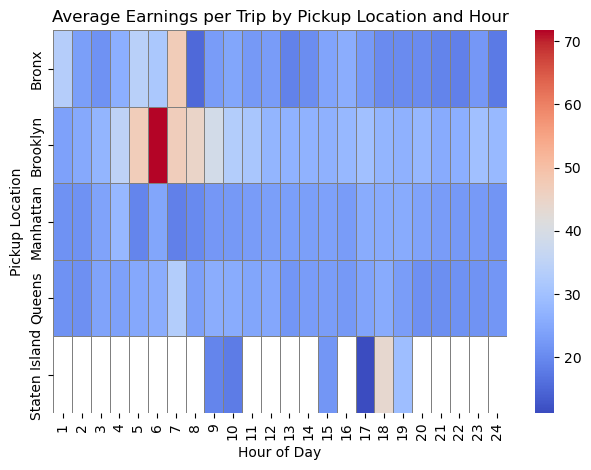

In [58]:
sns.heatmap(
    earnings_by_location_hour_pivot, cmap="coolwarm", linewidths=0.5, linecolor="gray"
)

plt.title("Average Earnings per Trip by Pickup Location and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Pickup Location")

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <b>Notes:</b> Brooklyn at 6–8 AM lit up as the top-earning zone (likely due to long distance trips).
</div>

In [60]:
# Show trip sort by earnings
trip_stats = (
    df.groupby("pickup_location")
    .agg(
        earnings=("earnings", "mean"),
        avg_distance=("trip_distance", "mean"),
        avg_duration_min=("duration_min", "mean"),
        trip_count=("trip_distance", "count"),
    )
    .sort_values(by="earnings", ascending=False)
)

trip_stats

earnings  avg_distance  avg_duration_min  trip_count
pickup_location                                                       
Brooklyn         28.541817      3.336873         21.683489        4397
Staten Island    26.140000      3.483750         14.997917           8
Manhattan        23.330862      2.514690         17.203933       27278
Queens           23.212916      3.013949         19.450091       10673
Bronx            22.281311      3.575437         18.403051         366

<div class="alert alert-info" role="alert">
    <b>Notes:</b> Meanwhile, Manhattan, though always busy, had lower earnings per ride, filled with short, fast-moving trips.
</div>

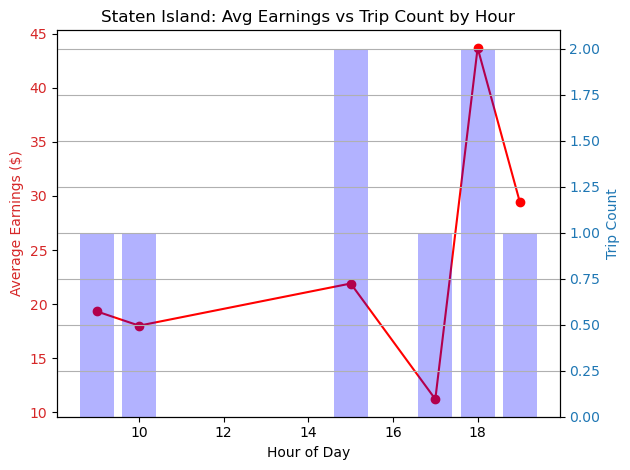

In [62]:
fig, ax1 = plt.subplots()
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Average Earnings ($)", color="tab:red")
ax1.plot(staten_hourly["hour"], staten_hourly["avg_earnings"], color="red", marker="o")
ax1.tick_params(axis="y", labelcolor="tab:red")

ax2 = ax1.twinx()
ax2.set_ylabel("Trip Count", color="tab:blue")
ax2.bar(staten_hourly["hour"], staten_hourly["trip_count"], alpha=0.3, color="blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Staten Island: Avg Earnings vs Trip Count by Hour")
plt.grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <b>Notes:</b> Then comes Staten Island: quiet most of the day, but at 6 PM, it spiked. Fewer rides but high-value ones.
</div>

## 2. What Really Drives Tips?
Longer trips and higher fares correlated strongly with better tips.\
A passenger on a long ride is more likely to reward the driver well.

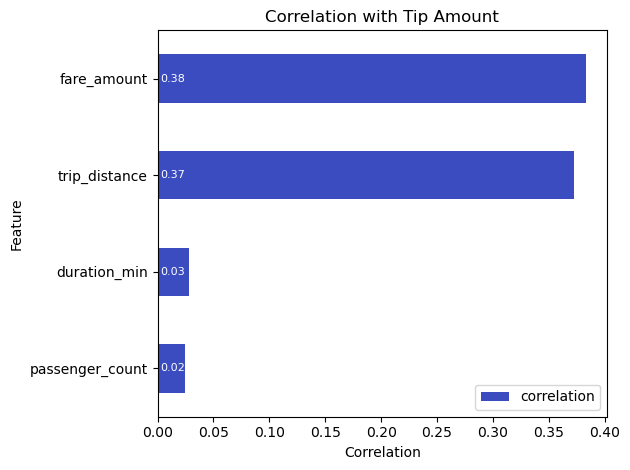

In [65]:
tip_corr.plot(kind="barh", cmap="coolwarm")

for i, v in enumerate(tip_corr["correlation"]):
    plt.text(x=0.002, y=i, s=f"{v:.2f}", va="center", fontsize=8, color="white")

plt.title("Correlation with Tip Amount")
plt.xlabel("Correlation")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    <b>Notes:</b> Longer trips and higher fares correlated strongly with better tips.
    <br>
    A passenger on a long ride is more likely to reward the driver well.
</div>

## 3: The Hidden Cost of “Busy”
These low-efficiency trips often occurred in the Bronx and Brooklyn during early hours.

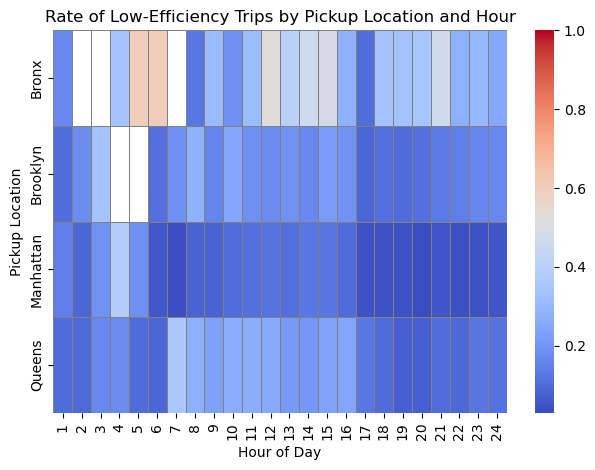

In [68]:
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, linecolor="gray", vmax=1.0)

plt.title("Rate of Low-Efficiency Trips by Pickup Location and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Pickup Location")

plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert">
    Focus to trips that took time and distance but yielded little money.
    <br>
    <b>Notes:</b> These low-efficiency trips often occurred in the Bronx and Brooklyn during early hours.
    <br>They looked productive, but weren’t profitable.
</div>

## 4. Cash Isn’t Always King
Aim for card-paying passengers and drive later in the day.

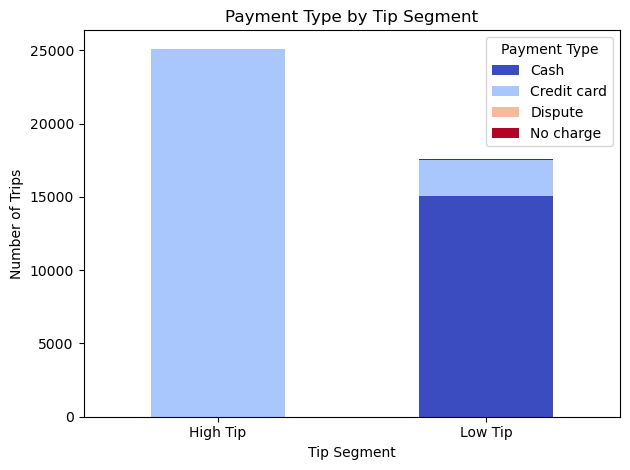

payment_type   Cash  Credit card  Dispute  No charge
tip_segment                                         
High Tip          1        25109        0          0
Low Tip       15030         2470       17         95

In [71]:
fig, ax = plt.subplots()

payment_group.plot(kind="bar", stacked=True, ax=ax, cmap="coolwarm")

plt.title("Payment Type by Tip Segment")
plt.xlabel("Tip Segment")
plt.ylabel("Number of Trips")
ax.legend(title="Payment Type")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

payment_group

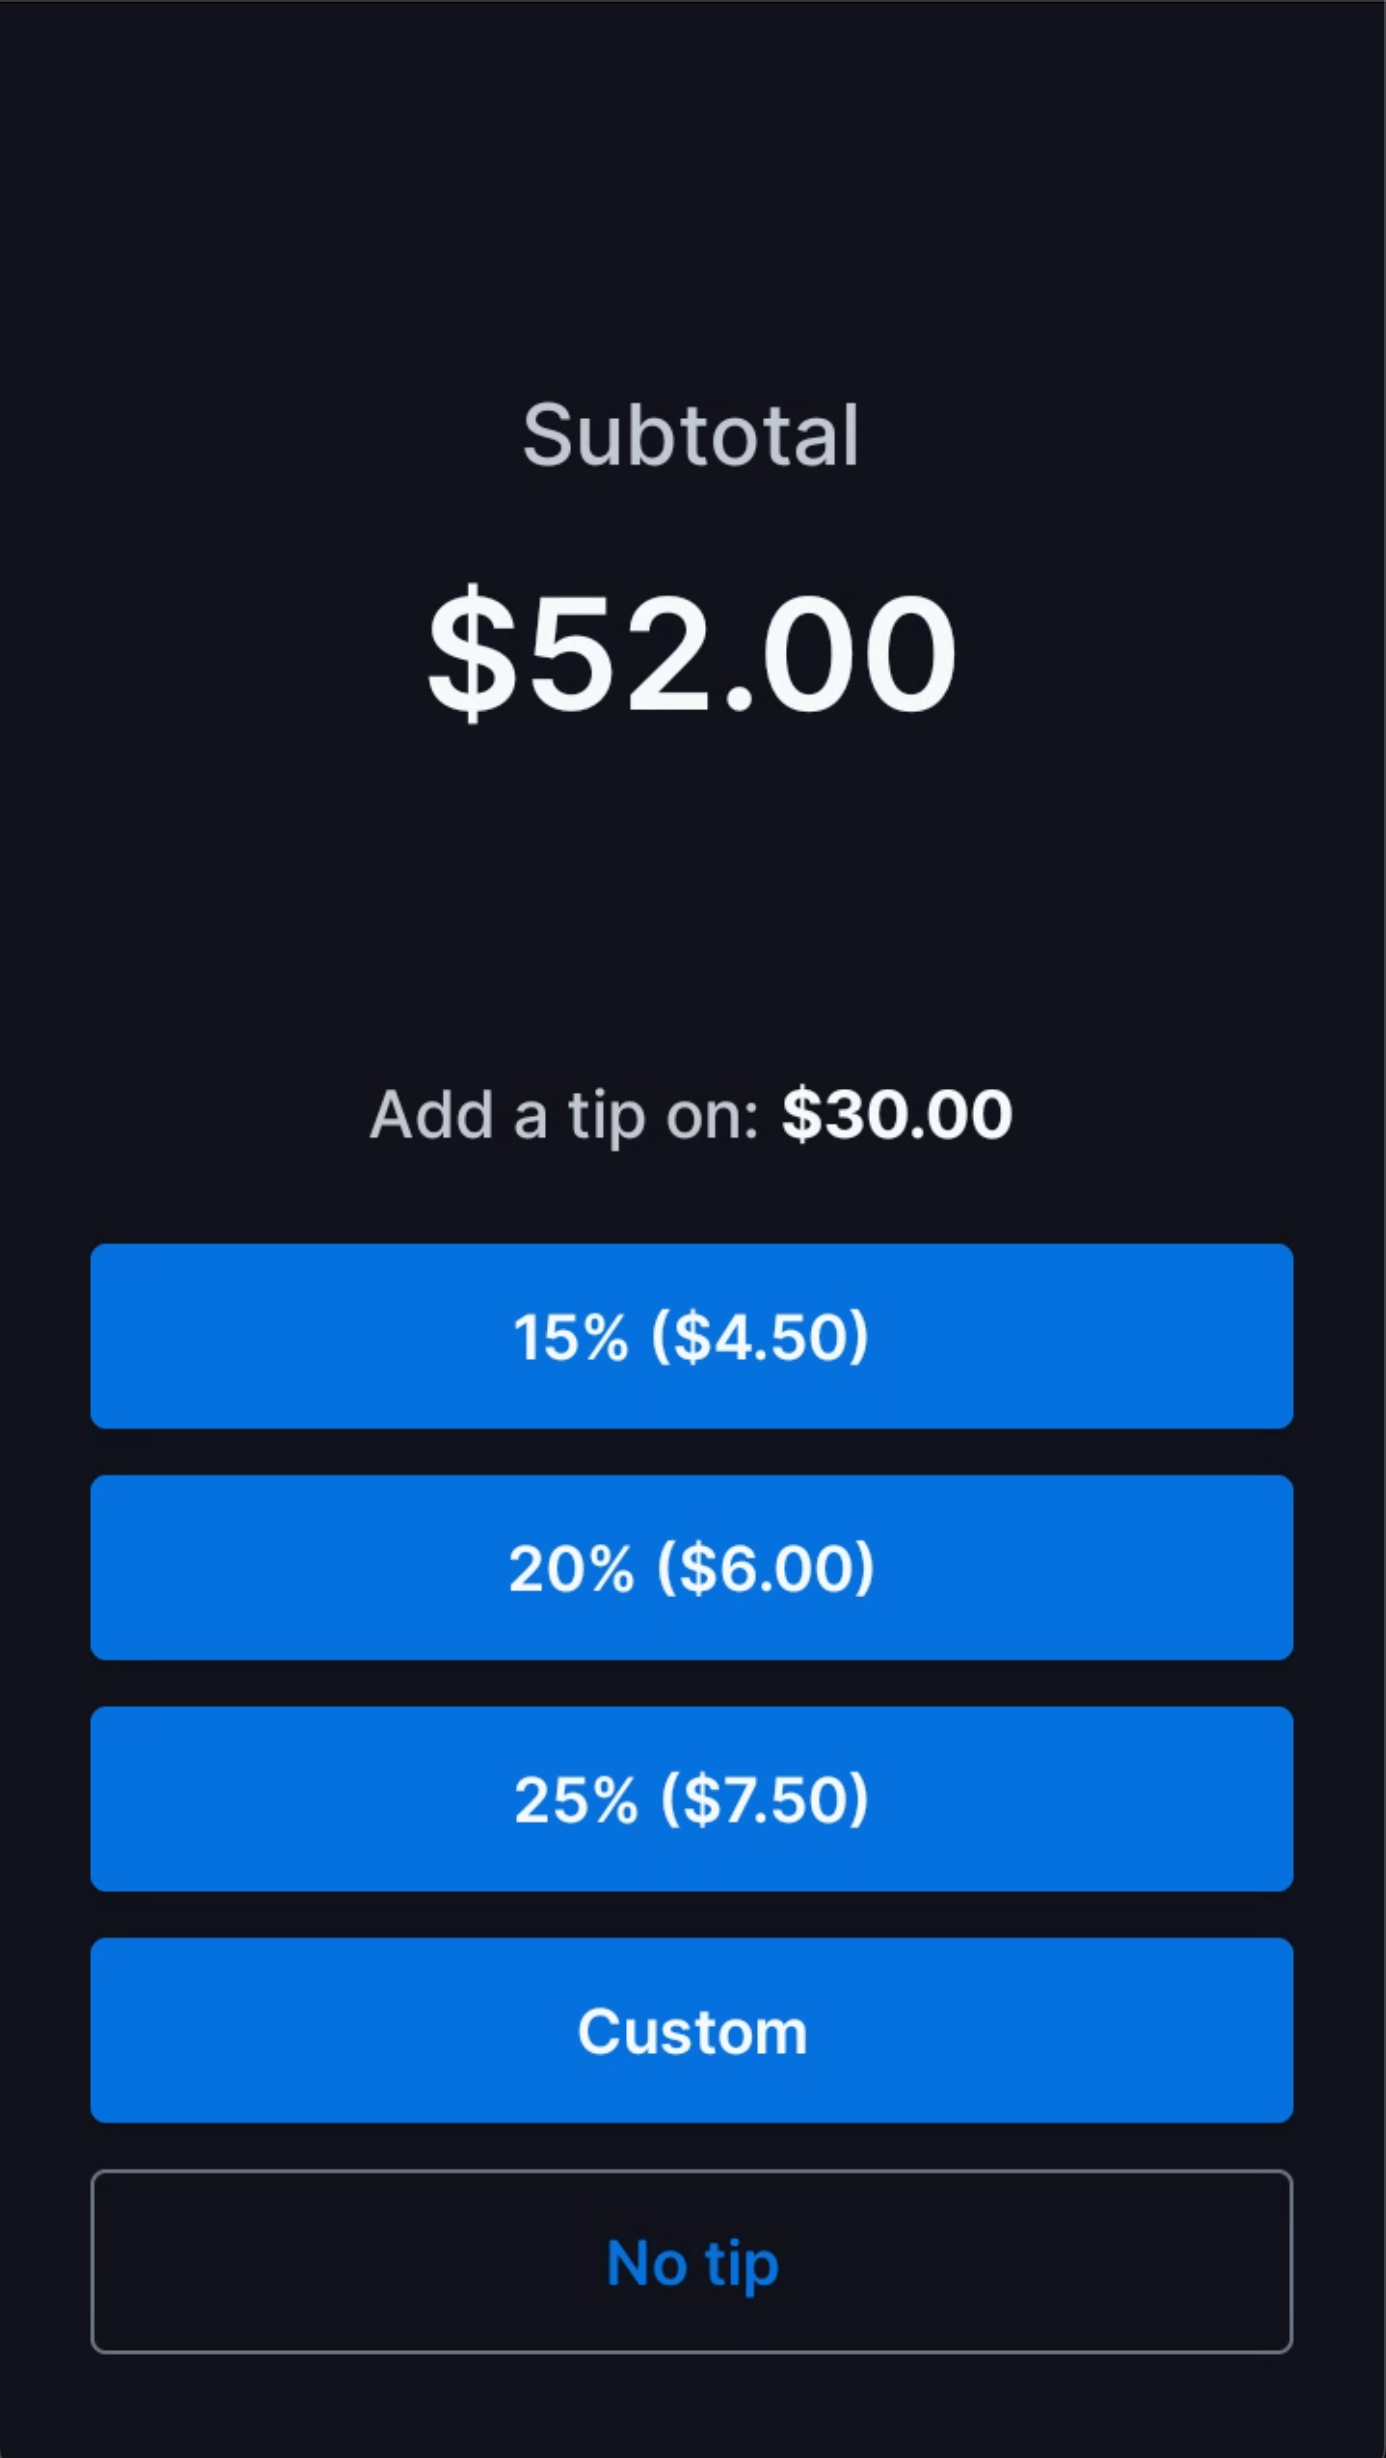
<div class="alert alert-info" role="alert">
    <b>Notes:</b> Credit card payments were dominant in high-tip segments, while cash users made up most low-tip trips, often early in the day.
    <br><br>
    Why? Credit cards often present tip suggestions
</div>

# Conclusion
1. Target Brooklyn mornings and Staten Island evenings
2. Focus on longer, higher-value trips
3. Watch out for time-wasting low-efficiency rides
4. Prefer digital payments, especially after noon

# Recommendation
1. **Drive Strategically by Time and Location**
    - Focus on Brooklyn between 6–8 AM for high-value commuter or airport trips.
    - Position near Staten Island around 6 PM, where rare but highly profitable trips occur
1. **Prioritize Quality Over Quantity**\
   Choose longer trips or routes with higher fares over short, frequent rides they yield better total earnings and tips.
1. **Avoid Low-Efficiency Zones**\
   Monitor trips with low earnings per minute/mile, especially in the Bronx or Brooklyn during early mornings, to reduce time and fuel waste.
1. **Encourage Card Payments to Boost Tips**\
   Aim to serve card-paying passengers, particularly in the afternoon/evening when tip amounts increase due to preset suggestions on digital terminals.

# Output

In [76]:
data = df[
    [
        "vendor_id",
        "pickup_location",
        "duration_min",
        "hour",
        "tip_segment",
        "tip_amount",
        "fare_amount",
        "trip_distance",
        "total_amount",
        "earnings",
        "payment_type",
        "passenger_count",
    ]
]
data.rename(columns={"vendor_id": "Trips"}, inplace=True)

In [77]:
tip_corr = tip_corr.reset_index()
tip_corr.columns = ["variable", "correlation_with_tip_amount"]

In [78]:
efficiency = merged[["pickup_location", "hour", "low_eff_rate"]]

In [79]:
data.to_csv("output/data.csv", index=False)

# Analysis 1
staten_hourly.to_csv("output/1_staten_hourly.csv", index=False)

# Analysis 2
tip_corr.to_csv("output/2_tipCorr.csv", index=False)

# Analysis 3
efficiency.to_csv("output/3_efficiency.csv", index=False)

# earnings_by_location_hour.to_csv("output/earningByLocationHour.csv",index=False)
# heatmap_data.to_csv("output/efficiency.csv",index=False)
# payment_group.to_csv("output/paymentGroup.csv",index=False)